**import libraries**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**EXERCISE 3.4 GASCAP DRIVE**
The gascap reservoir shown in fig. 3.6 is estimated, from volumetric calculations, to 
have had an initial oil volume N of 115 ×10**66 stb. The cumulative oil productio Np and cumulative gas oil ratio Rp are listed in table 3.1, as functions of the average 
reservoir pressure, over the first few years of production. (Also listed are the relevan 
PVT data, again taken from table 2.4, under the assumption that, for this particul r
application, pI = pb = 3330 psia).n
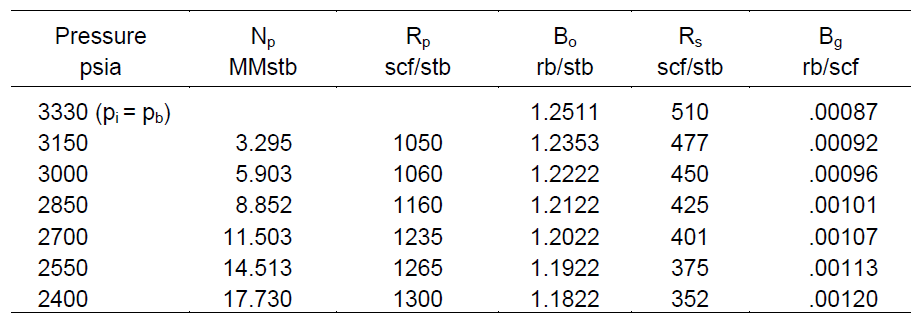

In [55]:
# Save data to datafream 

data = pd.DataFrame ({"Pressure" : [3330, 3150, 3000,2850, 2700, 2550, 2400],
                      "Np" : [0, 3.295, 5.903, 8.852, 11.503, 14.513, 17.730],
                      "Rp" : [0, 1050, 1060, 1160, 1235, 1265, 1300], 
                      "Bo" : [1.2511,1.2353,1.2222,1.2122,1.2022,1.1922,1.1822],
                      "Rs" : [510,477,450,425,401,375,352],
                      "Bg" : [0.00087,0.00092,0.00096,0.00101,0.00107,0.00113,0.00120]})
data

,Pressure,Np,Rp,Bo,Rs,Bg
0,3330,0.000,0,1.2511,510,0.00087
1,3150,3.295,1050,1.2353,477,0.00092
2,3000,5.903,1060,1.2222,450,0.00096
3,2850,8.852,1160,1.2122,425,0.00101
4,2700,11.503,1235,1.2022,401,0.00107
5,2550,14.513,1265,1.1922,375,0.00113
6,2400,17.730,1300,1.1822,352,0.00120


In [56]:
#input Boi & Rsi & Bgi
Boi = float(input("Please enter the value for Boi: "))
Rsi = float(input("Please enter the value for Rsi: "))
Bgi = float(input("Please enter the value for Bgi: "))
#Add Boi & Rsi as a column to the DataFrame
data['Boi'] = Boi
data['Rsi'] = Rsi
data['Bgi'] = Bgi


Please enter the value for Boi:  1.2511	
Please enter the value for Rsi:  510
Please enter the value for Bgi:  0.00087


Using the technique of Havlena and Odeh the material balance for a gascap drive 
reservoir can be expressed a


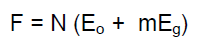

where :


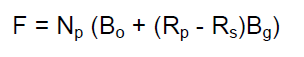

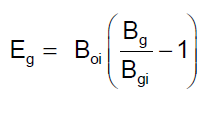

In [57]:
##def F(row):: This defines a function named F that takes a single argument, row.
##This argument will represent a row of a DataFrame when the function is applied.


def F (row): 
    return row['Np'] * (row['Bo'] + (row['Rp'] - row['Rs']) * row['Bg'])


In [58]:
def Eo (row):
    return ((row["Bo"] - row["Boi"]) + (row["Rsi"] - row["Rs"]) * row["Bg"])

In [59]:
def Eg (row):
    return row["Boi"] * ((row["Bg"] / row["Bgi"]) - 1)

In [60]:
data['F'] = data.apply(F,  axis=1)
data['Eo'] = data.apply(Eo,  axis=1)
data['Eg'] = data.apply(Eg,  axis=1)

data

,Pressure,Np,Rp,Bo,Rs,Bg,Boi,Rsi,Bgi,F,Eo,Eg
0,3330,0.000,0,1.2511,510,0.00087,1.2511,510.0,0.00087,0.000000,0.00000,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,1.2511,510.0,0.00087,5.807306,0.01456,0.071902
2,3000,5.903,1060,1.2222,450,0.00096,1.2511,510.0,0.00087,10.671443,0.02870,0.129424
3,2850,8.852,1160,1.2122,425,0.00101,1.2511,510.0,0.00087,17.301677,0.04695,0.201326
4,2700,11.503,1235,1.2022,401,0.00107,1.2511,510.0,0.00087,24.093954,0.06773,0.287609
5,2550,14.513,1265,1.1922,375,0.00113,1.2511,510.0,0.00087,31.898123,0.09365,0.373892
6,2400,17.730,1300,1.1822,352,0.00120,1.2511,510.0,0.00087,41.130054,0.12070,0.474555


In [61]:
m_value = [0.4, 0.5, 0.6] 

In [62]:
for m in m_value: 
    column_name = f"F_m_{m}"  # Create a new column name based on the value of m
    data[column_name] = (data["Eo"] + m * data["Eg"])
data    

,Pressure,Np,Rp,Bo,Rs,Bg,Boi,Rsi,Bgi,F,Eo,Eg,F_m_0.4,F_m_0.5,F_m_0.6
0,3330,0.000,0,1.2511,510,0.00087,1.2511,510.0,0.00087,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,1.2511,510.0,0.00087,5.807306,0.01456,0.071902,0.043321,0.050511,0.057701
2,3000,5.903,1060,1.2222,450,0.00096,1.2511,510.0,0.00087,10.671443,0.02870,0.129424,0.080470,0.093412,0.106354
3,2850,8.852,1160,1.2122,425,0.00101,1.2511,510.0,0.00087,17.301677,0.04695,0.201326,0.127481,0.147613,0.167746
4,2700,11.503,1235,1.2022,401,0.00107,1.2511,510.0,0.00087,24.093954,0.06773,0.287609,0.182774,0.211535,0.240296
5,2550,14.513,1265,1.1922,375,0.00113,1.2511,510.0,0.00087,31.898123,0.09365,0.373892,0.243207,0.280596,0.317985
6,2400,17.730,1300,1.1822,352,0.00120,1.2511,510.0,0.00087,41.130054,0.12070,0.474555,0.310522,0.357978,0.405433


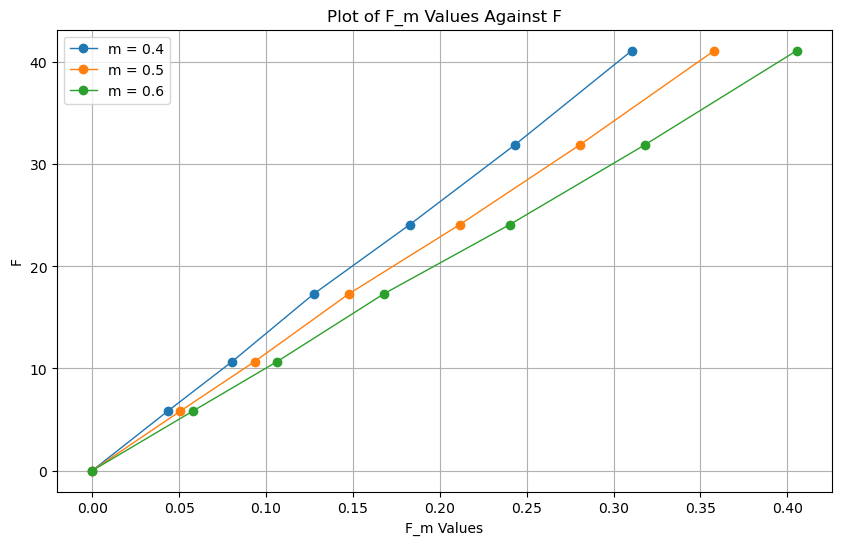

In [63]:

# Create a plot
plt.figure(figsize=(10, 6))

#  plot each column against 'F'
plt.plot(data['F_m_0.4'], data['F'], label='m = 0.4', marker='o' , lw=1)
plt.plot(data['F_m_0.5'], data['F'], label='m = 0.5',marker='o',  lw=1)
plt.plot(data['F_m_0.6'], data['F'], label='m = 0.6',marker='o',  lw=1)

# Customize plot
plt.xlabel('F_m Values')  
plt.ylabel('F')  
plt.title('Plot of F_m Values Against F')  
plt.legend()
plt.grid()
plt.show()


For m = 0.4 , The Oil Initially in Place is 131.78 MMSTB 
For m = 0.5 , The Oil Initially in Place is 114.37 MMSTB 
For m = 0.6 , The Oil Initially in Place is 101.02 MMSTB 


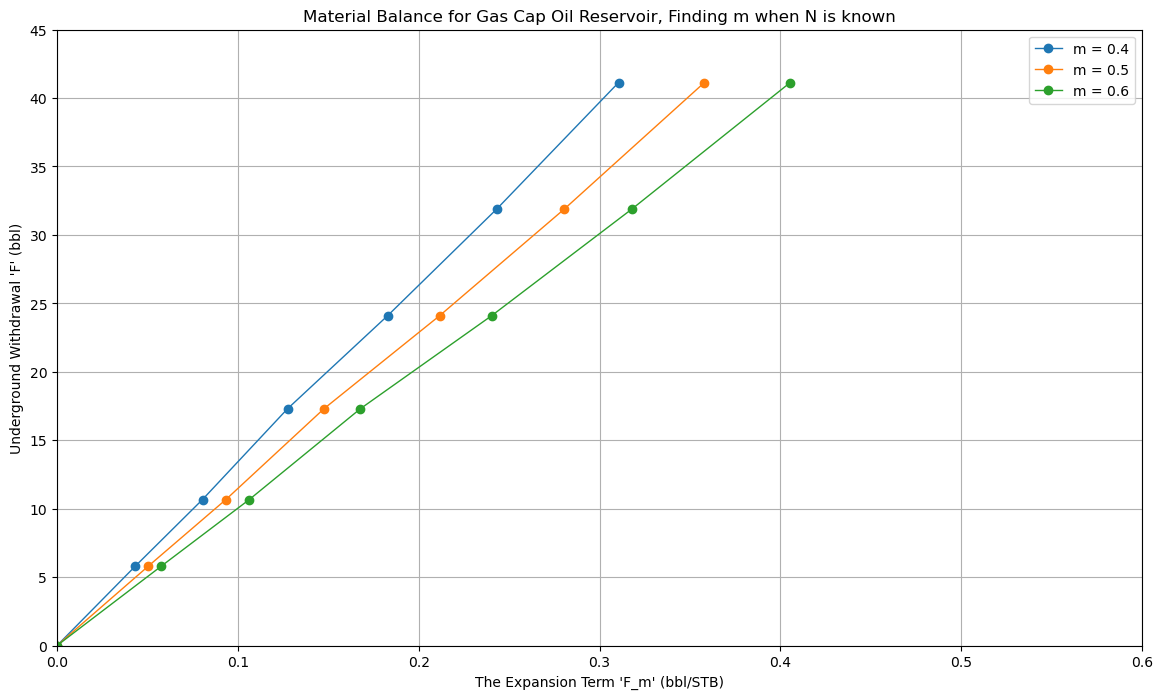

In [64]:
plt.figure(figsize=(14, 8))


plt.xlim(0, 0.6)
plt.ylim(0, 45)

plt.xlabel("The Expansion Term 'F_m' (bbl/STB)")
plt.ylabel("Underground Withdrawal 'F' (bbl)")
plt.title("Material Balance for Gas Cap Oil Reservoir, Finding m when N is known")

for i in m_value:
    plt.plot(data[f"F_m_{i}"], data["F"], label=f"m = {i}", marker='o', lw=1)
    
    # Fit a linear model to the data
    x = data[f"F_m_{i}"]
    y = data["F"]
    Model = np.polyfit(x, y, 1)  # Linear fit

    
    # Calculate N based on the model (the slope)
    N = Model[0]  # This represents the oil initially in place
    
    print(f"For m = {i} , The Oil Initially in Place is {N:.2f} MMSTB ")


# Finalize the plot
plt.legend(loc='best')
plt.grid()
plt.show()

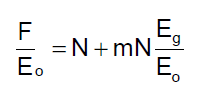

In [65]:
##This defines a function named F_Eo that takes one argument row. 
##In the context of applying this function to a DataFrame, row refers to a single row of data in the DataFrame.

def F_Eo (row): 
    return row['F'] /row['Eo'] 

In [66]:
def Eg_Eo (row): 
    return row['Eg'] /row['Eo'] 

In [67]:
##data.apply(F_Eo, axis=1): This applies the previously defined function F_Eo to each row of the DataFrame. 
##The function calculates the ratio of the F column to the Eo column for each row.

data['F_Eo'] = data.apply(F_Eo,  axis=1)
data['Eg_Eo'] = data.apply(Eg_Eo, axis=1)
dataset = data[["Pressure", "F_Eo", "Eg_Eo"]]
dataset

C:\Users\p\AppData\Local\Temp\ipykernel_11340\879084661.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return row['F'] /row['Eo']
C:\Users\p\AppData\Local\Temp\ipykernel_11340\238591278.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return row['Eg'] /row['Eo']


,Pressure,F_Eo,Eg_Eo
0,3330,NaN,NaN
1,3150,398.853413,4.938345
2,3000,371.827296,4.509552
3,2850,368.512814,4.288103
4,2700,355.735328,4.246408
5,2550,340.609959,3.992439
6,2400,340.762668,3.931692


assign() function is used to add a new column to a DataFrame. 
lambda df: is a way of applying this operation to the DataFrame without explicitly naming it.
After this new column is created, the expression ['Eg_Eo'] extracts only this column from the dataset.
.iloc[1:7]:
This takes the rows from index 1 to 6 (Python indexing is zero-based, so 1:7 grabs rows 1 through 6). These rows are selected from the new 'Eg_Eo' column created

In [81]:
X = dataset.assign(Eg_Eo=lambda df: data['Eg'] / data['Eo'])['Eg_Eo'].iloc[1:7]
Y = dataset.assign(F_Eo=lambda df: data['F'] / data['Eo'])['F_Eo'].iloc[1:7]
MODEL = np.polyfit(X, Y, 1)
MODEL

array([ 58.83013376, 108.70272737])

In [86]:
XXFitted = list(X)  # Assuming X is already defined as in previous examples
XXFitted.append(0)

# Calculate the fitted YY values based on the model
YYFitted = [MODEL[0] * i + MODEL[1] for i in XXFitted]

# Print the fitted YY & XX values
print(XXFitted)
print(YYFitted)

[4.938344701275751, 4.509551844286939, 4.288103019842596, 4.246407727776458, 3.992439444986536, 3.9316915692940655, 0]
[399.22620669354853, 374.0002655622319, 360.9724015995213, 358.5194619901731, 343.57847394324, 340.0046682907107, 108.70272737219952]


XXFitted and YYFitted: These are used to plot the fitted line based on the model.
dataset["Eg_Eo"] and dataset["F_Eo"]: These are used to plot the actual production data points.
The intercept (initial oil in place, MODEL[1]) is plotted as a blue point at (0, MODEL[1]).

plt.text(x, y, text, fontsize=10):

The plt.text() function is used to place text inside the plot. You can adjust the (x, y) coordinates to move the text around based on the range of your plot. In this case, I've placed the text at (0.5, 400), (0.5, 370), and (0.5, 340) to ensure it appears within the visible region of your plot.
The text size is set using the fontsize parameter.

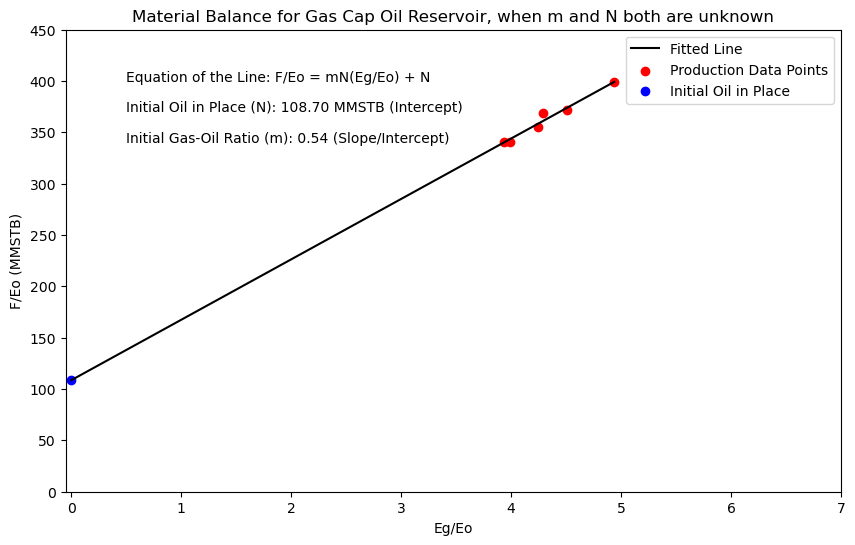

In [85]:
plt.figure(figsize=(10, 6))

# Plot the fitted line (X_fitted vs Y_fitted)
plt.plot(XXFitted, YYFitted, label="Fitted Line", color='black')

# Scatter plot of actual production data points
plt.scatter(dataset["Eg_Eo"], dataset["F_Eo"], c="red", label="Production Data Points")

# Scatter plot of the initial oil in place (at X=0, Y=intercept)
plt.scatter(0, MODEL[1], color="blue", label="Initial Oil in Place")

# Adding labels, title, and legend
plt.xlabel("Eg/Eo")
plt.ylabel('F/Eo (MMSTB)')
plt.title("Material Balance for Gas Cap Oil Reservoir, when m and N both are unknown")
plt.legend(loc='best')

# Setting the limits of the plot
plt.xlim(-0.05, 7)
plt.ylim(0, 450)


plt.text(0.5, 400, "Equation of the Line: F/Eo = mN(Eg/Eo) + N", fontsize=10)
plt.text(0.5, 370, f"Initial Oil in Place (N): {MODEL[1]:.2f} MMSTB (Intercept)", fontsize=10)
plt.text(0.5, 340, f"Initial Gas-Oil Ratio (m): {MODEL[0] / MODEL[1]:.2f} (Slope/Intercept)", fontsize=10)
# Displaying the plot
plt.show()


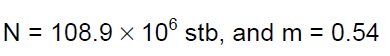